In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path=r"C:\Users\DEBARSHI\Downloads\annotated_points_np_200.csv"
df=pd.read_csv(path)
df.shape
df.head()

,x,y,labels
0,1.679025,3.118646,1
1,1.792377,3.294940,1
2,1.565673,3.529999,1
3,2.104095,3.647529,1
4,1.934067,4.529000,1


In [3]:
print(df['labels'].value_counts())

labels
1    100
2    100
Name: count, dtype: int64


In [4]:
df['labels']=df['labels'].map({1:-1,2:1})

In [5]:
X=df[['x','y']].values
y=df['labels'].values

## **Method 1: Random Initialization**

In [6]:
def perceptron_learning_algo_random(X,y,epochs=1000,eta=0.1):
    weights=np.random.uniform(-1,1,X.shape[1])

    for _ in range(epochs):
        for idx,x_i in enumerate(X):  #using enumerate instead of range to get both index and value
            yhat=np.sign(np.dot(x_i,weights))
            if yhat!=y[idx]:
                weights+=eta*y[idx]*x_i
    return weights


In [7]:
X_aug=np.hstack((np.ones((X.shape[0],1)),X))  #added the bias term to the input matrix so didn't have to do w*x_i+b seperately
w1=perceptron_learning_algo_random(X_aug,y)
print("The weights are:",w1[1],"and",w1[2])
print("The bias is:",w1[0])

The weights are: 3.944458903524863 and 0.8882283375792202
The bias is: -46.897184497165604


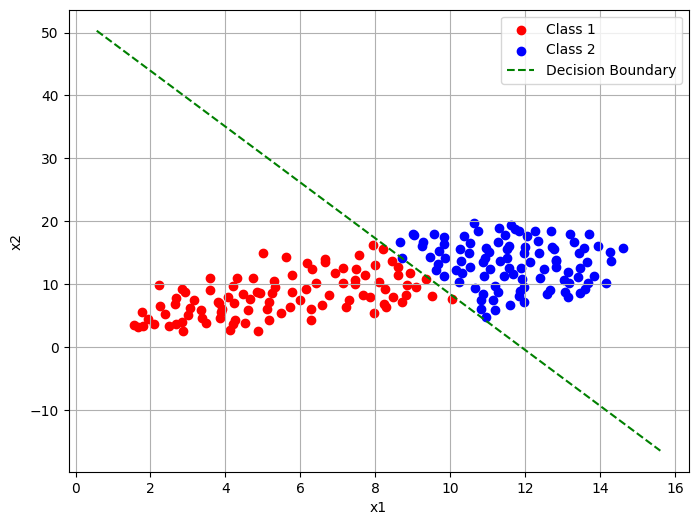

In [8]:
x1=np.linspace(X[:,0].min()- 1,X[:,0].max()+ 1,100)
x2=-(w1[1]*x1+w1[0])/w1[2]
plt.figure(figsize=(8,6))
plt.scatter(X[y==-1,0],X[y==-1,1],color='red',label='Class 1')
plt.scatter(X[y==1,0],X[y==1,1],color='blue',label='Class 2')
plt.plot(x1, x2, color='green',linestyle='--',label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

# **Method 2:Initialization with Zeroes**

In [9]:
def perceptron_learning_algo_zeros(X,y,epochs=1000,eta=0.1):
    weights=np.zeros(X.shape[1])

    for _ in range(epochs):
        for idx,x_i in enumerate(X):
            yhat=np.sign(np.dot(x_i,weights))
            if yhat!=y[idx]:
                weights+=eta*y[idx]*x_i
    return weights

In [10]:
X_aug=np.hstack((np.ones((X.shape[0],1)),X))
w2=perceptron_learning_algo_zeros(X_aug,y)
print("The weights are:",w2[1],"and",w2[2])
print("The bias is:",w2[0])

The weights are: 3.9857365626999712 and 0.8703062707000464
The bias is: -47.0000000000004


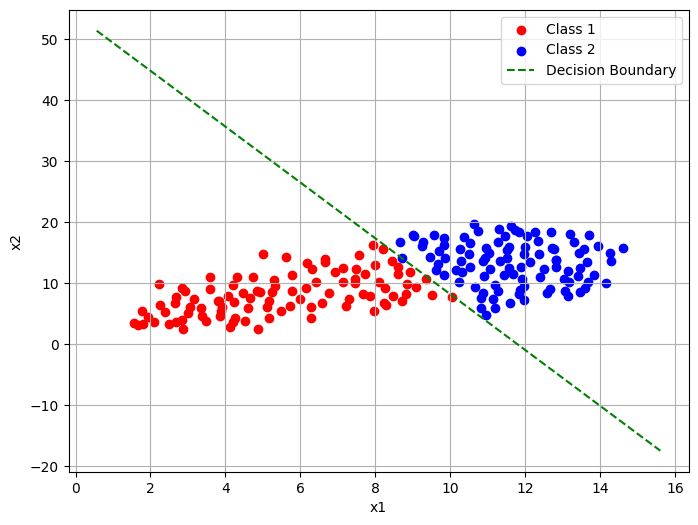

In [11]:
x1=np.linspace(X[:,0].min()- 1,X[:,0].max()+ 1,100)
x2=-(w2[1]*x1+w2[0])/w2[2]
plt.figure(figsize=(8,6))
plt.scatter(X[y==-1,0],X[y==-1,1],color='red',label='Class 1')
plt.scatter(X[y==1,0],X[y==1,1],color='blue',label='Class 2')
plt.plot(x1, x2, color='green',linestyle='--',label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

# **Method 3: From the Dataset**

In [12]:
def perceptron_learning_algo_dataset(X,y,epochs=1000,eta=0.1):
    weights=np.mean(X,axis=0)

    for _ in range(epochs):
        for idx,x_i in enumerate(X):
            yhat=np.sign(np.dot(x_i,weights))
            if yhat!=y[idx]:
                weights+=eta*y[idx]*x_i
    return weights

In [13]:
X_aug=np.hstack((np.ones((X.shape[0],1)),X))
w3=perceptron_learning_algo_dataset(X_aug,y)
print("The weights are:",w3[1],"and",w3[2])
print("The bias is:",w3[0])

The weights are: 4.100363684704972 and 0.9082683064800501
The bias is: -48.200000000000415


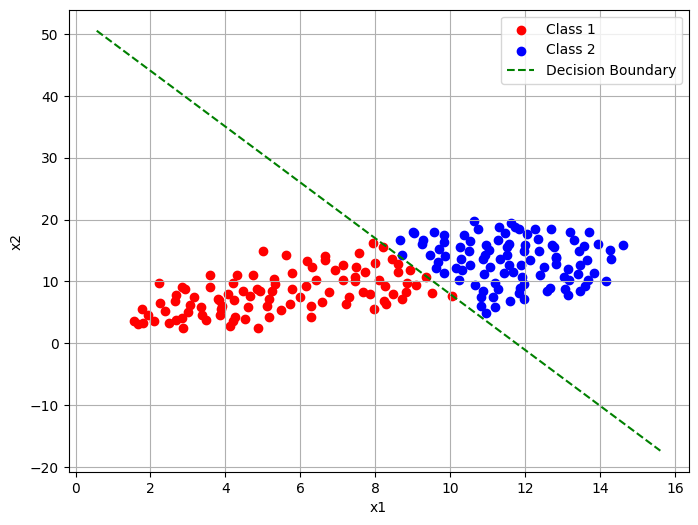

In [14]:
x1=np.linspace(X[:,0].min()- 1,X[:,0].max()+ 1,100)
x2=-(w3[1]*x1+w3[0])/w3[2]
plt.figure(figsize=(8,6))
plt.scatter(X[y==-1,0],X[y==-1,1],color='red',label='Class 1')
plt.scatter(X[y==1,0],X[y==1,1],color='blue',label='Class 2')
plt.plot(x1, x2, color='green',linestyle='--',label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()